# Introduction to `lamatrix`: Fitting with priors

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-1, 1, 0.01)
y = x * 2.3459 + 1.435 + np.random.normal(0, 5, size=len(x))
ye = np.ones(len(x)) * 5

<ErrorbarContainer object of 3 artists>

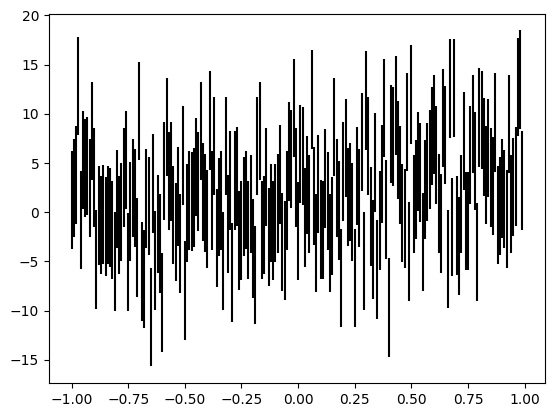

In [3]:
plt.errorbar(x, y, ye, ls='', c='k')

In [4]:
from lamatrix import Polynomial, Constant

In [5]:
model = Polynomial('x', order=1) + Constant()
model.fit(x=x, data=y, errors=ye)

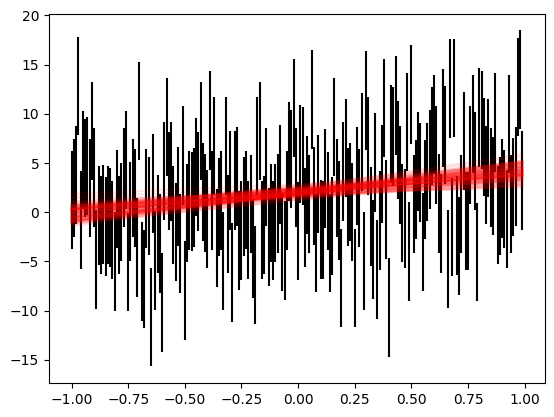

In [6]:
plt.errorbar(x, y, ye, ls='', c='k')
plt.plot(x, np.asarray([model.sample(x=x) for count in range(100)]).T, c='r', alpha=0.1);

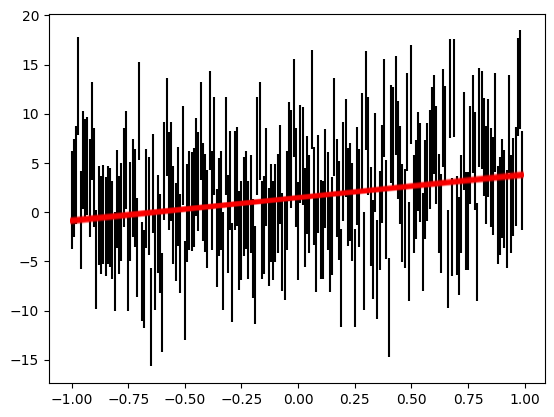

In [7]:
model = Polynomial('x', order=1, priors=[(2.3459, 0.1)]) + Constant(priors=[(1.435, 0.1)])
model.fit(x=x, data=y, errors=ye)
plt.errorbar(x, y, ye, ls='', c='k')
plt.plot(x, np.asarray([model.sample(x=x) for count in range(100)]).T, c='r', alpha=0.1);